In [1]:
import pyscreenshot as ImageGrab
import time
images_folder="captured_images/0/"
 
for i in range(0,5):
   time.sleep(2)
   im=ImageGrab.grab(bbox=(60,170,400,550)) #x1,y1,x2,y2
   print("saved......",i)
   im.save(images_folder+str(i)+'.png')
   print("clear screen now and redraw now........")

saved...... 0
clear screen now and redraw now........
saved...... 1
clear screen now and redraw now........
saved...... 2
clear screen now and redraw now........
saved...... 3
clear screen now and redraw now........
saved...... 4
clear screen now and redraw now........


In [10]:
import cv2
import csv
import glob
 
header  =["label"]
for i in range(0,784):
   header.append("pixel"+str(i))
with open('dataset.csv', 'a') as f:
   writer = csv.writer(f)
   writer.writerow(header)
   
for label in range(10):
   dirList = glob.glob("captured_images/"+str(label)+"/*.png")
   
   for img_path in dirList:
       im= cv2.imread(img_path)
       im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
       im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
       roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
       
       data=[]
       data.append(label)
       rows, cols = roi.shape
       
       ## Add pixel one by one into data array
       for i in range(rows):
           for j in range(cols):
               k =roi[i,j]
               if k>100:
                   k=1
               else:
                   k=0
               data.append(k)
       with open('dataset.csv', 'a') as f:
           writer = csv.writer(f)
           writer.writerow(data)
 
#load the dataset
import pandas as pd
from sklearn.utils import shuffle
data  =pd.read_csv('dataset.csv')
data=shuffle(data)
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41,8,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
38,7,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
34,6,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
46,9,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
45,9,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
23,4,1,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,0,0,0,0
18,3,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
24,4,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
42,8,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


9


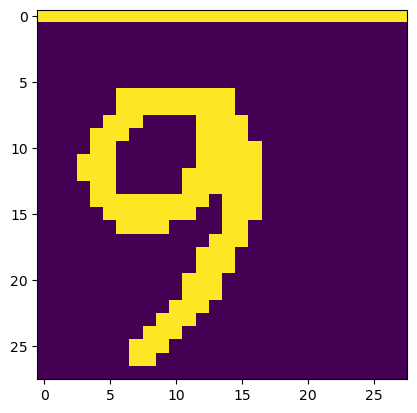

In [12]:
X = data.drop(["label"],axis=1)
Y= data["label"]
 
#preview of one image using matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 49
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)